In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import sys
from tqdm import tqdm
import math
sys.path.append("../../packages/")

from utilities import *
from made import *
from global_steps import *

In [2]:
def gaussian_m(m, N):
    return np.sqrt(2*N/np.pi)*np.exp(-N*m**2/2)

In [3]:
def setup_model(W, N = 100):
    model = made(N)
    weights = model.layer.weight.detach()

    # Update each row i of the weight matrix with W[i]
    for i in range(weights.shape[0]):
        weights[i, :] = W[i]

    # Set the upper triangular part of the matrix to 0
    weights = np.tril(weights, -1)  # Keep only the lower triangular part

    # Set the updated weights back to the model
    model.layer.weight.data = torch.tensor(weights)
    model = model.cuda()
    return model

# Test for the scaling of the magnetization

## Dependence on the temperature

In [83]:
N = 100

W = np.concatenate([np.array([0]),np.loadtxt("couplings_N100_beta1.txt")]) #Need to add the starting 0
model_B1 = setup_model(W)

W = np.concatenate([np.array([0]),np.loadtxt("couplings_N100_beta0.8.txt")]) #Need to add the starting 0
model_B0p8 = setup_model(W)

W = np.concatenate([np.array([0]),np.loadtxt("couplings_N100_beta1.5.txt")]) #Need to add the starting 0
model_B1p5 = setup_model(W)

W = torch.zeros(N)
model_B0 = setup_model(W)


In [84]:
data_B1 = generate_config_fast(model_B1, 100, 5000000, None).mean(1)
data_B0p8 = generate_config_fast(model_B0p8, 100, 5000000, None).mean(1)
data_B1p5 = generate_config_fast(model_B1p5, 100, 5000000, None).mean(1)
data_B0 = generate_config_fast(model_B0, 100, 5000000, None).mean(1)


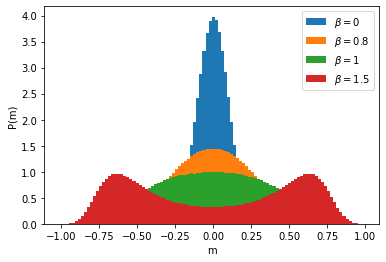

In [85]:
import matplotlib.pyplot as plt
import numpy as np

a = 1

bin_edges = np.linspace(-1, 1, 101)-0.01  # Ensures symmetry

# Plot each histogram individually
res_B0 = plt.hist(data_B0.cpu().numpy(), bins=bin_edges, density=True, alpha=a, label=r"$\beta = 0$")
res_B0p8 = plt.hist(data_B0p8.cpu().numpy(), bins=bin_edges, density=True, alpha=a, label=r"$\beta = 0.8$")
res_B1 = plt.hist(data_B1.cpu().numpy(), bins=bin_edges, density=True, alpha=a, label=r"$\beta = 1$")
res_B1p5 = plt.hist(data_B1p5.cpu().numpy(), bins=bin_edges, density=True, alpha=a, label=r"$\beta = 1.5$")

plt.xlabel('m')
plt.ylabel('P(m)')
plt.legend()
plt.show()


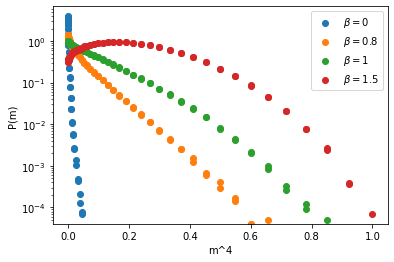

In [86]:
power = 4

plt.scatter(((res_B0[1][:-1]+res_B0[1][1:])/2)**power, res_B0[0], label=r"$\beta = 0$")
plt.scatter(((res_B0p8[1][:-1]+res_B0p8[1][1:])/2)**power, res_B0p8[0], label=r"$\beta = 0.8$")
plt.scatter(((res_B1[1][:-1]+res_B1[1][1:])/2)**power, res_B1[0], label=r"$\beta = 1$")
plt.scatter(((res_B1p5[1][:-1]+res_B1p5[1][1:])/2)**power, res_B1p5[0], label=r"$\beta = 1.5$")


plt.yscale('log')

plt.xlabel(f'm^{power}')
plt.ylabel('P(m)')
plt.legend()
plt.show()

## Scaling in $N$

In [73]:
W = np.concatenate([np.array([0]),np.loadtxt("couplings_N100_beta1.txt")]) #Need to add the starting 0
model_N100 = setup_model(W, N = 100)

W = np.concatenate([np.array([0]),np.loadtxt("couplings_N20_beta1.txt")]) #Need to add the starting 0
model_N20 = setup_model(W, N = 20)

W = np.concatenate([np.array([0]),np.loadtxt("couplings_N50_beta1.txt")]) #Need to add the starting 0
model_N50 = setup_model(W, N = 50)

W = np.concatenate([np.array([0]),np.loadtxt("couplings_N500_beta1.txt")]) #Need to add the starting 0
model_N500 = setup_model(W, N = 500)

In [74]:
data_N20 = generate_config_fast(model_N20, 20, 5000000, None).mean(1)
data_N50 = generate_config_fast(model_N50, 50, 5000000, None).mean(1)
data_N100 = generate_config_fast(model_N100, 100, 5000000, None).mean(1)
data_N500 = generate_config_fast(model_N500, 500, 5000000, None).mean(1)

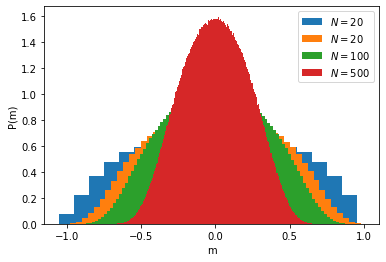

In [75]:
import matplotlib.pyplot as plt
import numpy as np

a = 1

# Plot each histogram individually
bin_edges = np.linspace(-1, 1, 21)-0.05  # Ensures symmetry
res_N20 = plt.hist(data_N20.cpu().numpy(), bins=bin_edges, density=True, alpha=a, label=r"$N = 20$")
bin_edges = np.linspace(-1, 1, 51)-0.02  # Ensures symmetry
res_N50 = plt.hist(data_N50.cpu().numpy(), bins=bin_edges, density=True, alpha=a, label=r"$N = 20$")
bin_edges = np.linspace(-1, 1, 101)-0.01  # Ensures symmetry
res_N100 = plt.hist(data_N100.cpu().numpy(), bins=bin_edges, density=True, alpha=a, label=r"$N = 100$")
bin_edges = np.linspace(-1, 1, 501)-0.002  # Ensures symmetry
res_N500 = plt.hist(data_N500.cpu().numpy(), bins=bin_edges, density=True, alpha=a, label=r"$N = 500$")

plt.xlabel('m')
plt.ylabel('P(m)')
plt.legend()
plt.show()

/home/delbono/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/home/delbono/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


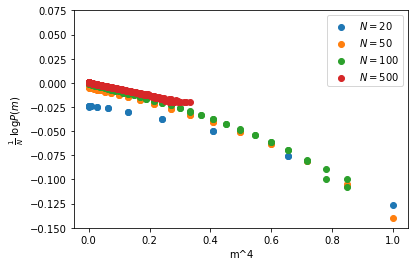

In [76]:
power = 4

plt.scatter(((res_N20[1][:-1]+res_N20[1][1:])/2)**power,   np.log(res_N20[0])/20, label=r"$N = 20$")
plt.scatter(((res_N50[1][:-1]+res_N50[1][1:])/2)**power,   np.log(res_N50[0])/50, label=r"$N = 50$")
plt.scatter(((res_N100[1][:-1]+res_N100[1][1:])/2)**power, np.log(res_N100[0])/100, label=r"$N = 100$")
plt.scatter(((res_N500[1][:-1]+res_N500[1][1:])/2)**power, np.log(res_N500[0])/500, label=r"$N = 500$")


plt.ylim(-0.15,0.075)

plt.xlabel(f'm^{power}')
plt.ylabel(r'$\frac{1}{N} \; \log P(m)$')
plt.legend()
plt.show()

# Dynamic programming

In [87]:
J = np.concatenate([np.array([0]),np.loadtxt("couplings_N100_beta1.txt")]) #Need to add the starting 0
model_N100 = setup_model(J, N = 100)

In [88]:
from scipy.special import expit

N = len(J)

# Initialize the probability distribution: only m = 0 has probability 1
prob = {0: 1.0}

for l in tqdm(range(N)):
    new_prob = {}
    for m, p in prob.items():
        x = 2 * J[l] * m  # Note: x = 2*J_l*m
        p_up = expit(x)   # Numerically stable logistic function
        p_down = 1.0 - p_up
        new_prob[m + 1] = new_prob.get(m + 1, 0.0) + p * p_up
        new_prob[m - 1] = new_prob.get(m - 1, 0.0) + p * p_down
    prob = new_prob

# The keys of prob now range from -N to N
# If you need a vector with indices corresponding to magnetizations from -N to N,
# you can convert it as follows:
result = np.array([prob.get(m, 0) for m in range(-N, N + 1)])

100%|██████████| 100/100 [00:00<00:00, 3501.53it/s]


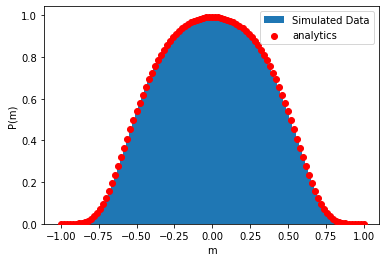

In [89]:
res_B1 = plt.hist(data_B1.cpu().numpy(), bins=bin_edges, density=True, alpha=a, label=r"Simulated Data")
plt.scatter(np.arange(-N, N + 1)[::2]/N, N/2*result[::2], color = "r", zorder = 3, label ="analytics")
plt.xlabel('m')
plt.ylabel('P(m)')
plt.legend()
plt.show()

In [95]:
N = 100
Neff = int(N/2)
W = (np.concatenate([np.array([0]),np.loadtxt(f"couplings_N{N}_beta1.txt")]))
probMADE = compute_Pm(W)[::2]

100%|██████████| 100/100 [00:00<00:00, 3283.06it/s]


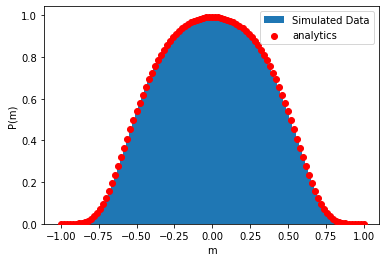

In [96]:
res_B1 = plt.hist(data_B1.cpu().numpy(), bins=bin_edges, density=True, alpha=a, label=r"Simulated Data")
plt.scatter(np.arange(-N, N + 1)[::2]/N, N/2*probMADE, color = "r", zorder = 3, label ="analytics")
plt.xlabel('m')
plt.ylabel('P(m)')
plt.legend()
plt.show()

In [97]:
x = probMADE[Neff:]
x[1:] += probMADE[:Neff,][::-1]
probMADE = x

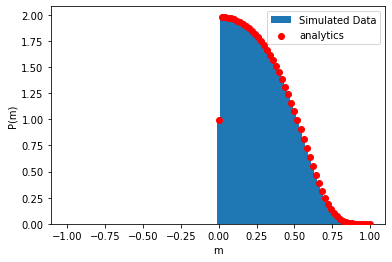

In [99]:
res_B1 = plt.hist(np.abs(data_B1.cpu().numpy()), bins=bin_edges, density=True, alpha=a, label=r"Simulated Data")
plt.scatter(np.arange(0, N + 1)[::2]/N, N/2*probMADE, color = "r", zorder = 3, label ="analytics")
plt.xlabel('m')
plt.ylabel('P(m)')
plt.legend()
plt.show()

# Scaling delle J

In [8]:
W100 = np.concatenate([np.array([0]),np.loadtxt("couplings_N100_beta1.0.txt")]) #Need to add the starting 0
model_N100 = setup_model(W100, N = 100)

W20 = np.concatenate([np.array([0]),np.loadtxt("couplings_N20_beta1.txt")]) #Need to add the starting 0
model_N20 = setup_model(W20, N = 20)

W50 = np.concatenate([np.array([0]),np.loadtxt("couplings_N50_beta1.txt")]) #Need to add the starting 0
model_N50 = setup_model(W50, N = 50)

W500 = np.concatenate([np.array([0]),np.loadtxt("couplings_N500_beta1.txt")]) #Need to add the starting 0
model_N500 = setup_model(W500, N = 500)

In [9]:
Ws_stacked = np.vstack((W20[1:20], W50[1:20], W100[1:20], W500[1:20])).T
N = np.array([20, 50, 100, 500])

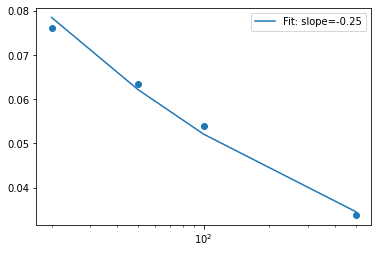

In [10]:
from scipy.stats import linregress

l = 10
plt.scatter(N**1, Ws_stacked[l])
plt.xscale('log')
log_N = np.log(N)
log_Ws = np.log(Ws_stacked[l])

slope, intercept, r_value, p_value, std_err = linregress(log_N, log_Ws)

plt.plot(N, np.exp(intercept + slope * log_N), label=f'Fit: slope={slope:.2f}')
plt.legend()


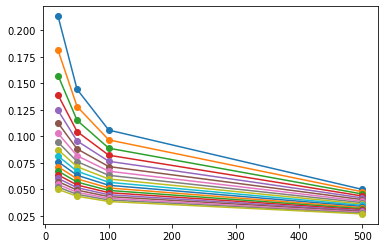

In [11]:
for l in np.arange(19):
    plt.plot(N, Ws_stacked[l], marker = 'o')


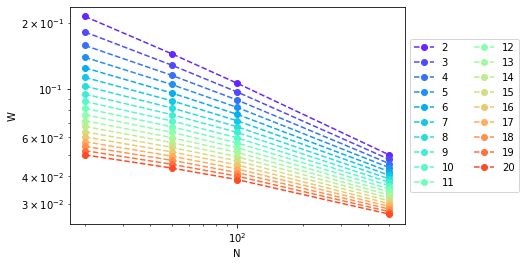

In [14]:
for l in np.arange(19):
    plt.plot(N, Ws_stacked[l], marker='o', ls="--", label=f"{l+2}", color=plt.cm.rainbow(0.05 + 0.9 * l / 19))
plt.xscale("log")
plt.yscale("log")
plt.xlabel('N')
plt.ylabel('W')
#plt.grid(True, which="both", ls="--")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2)
plt.show()

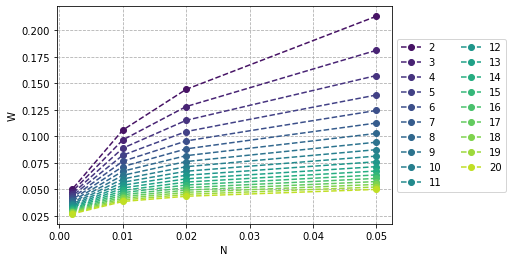

In [13]:
for l in np.arange(19):
    plt.plot(1/N, Ws_stacked[l], marker='o', ls="--", label=f"{l+2}", color=plt.cm.viridis(0.05 + 0.9 * l / 19))
plt.xlabel('N')
plt.ylabel('W')
plt.grid(True, which="both", ls="--")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2)
plt.show()

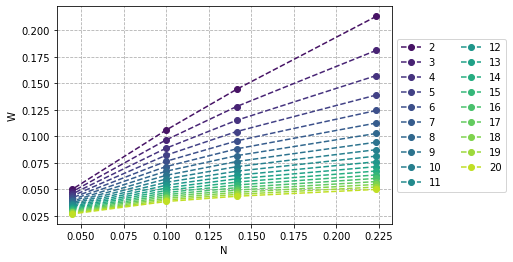

In [62]:
for l in np.arange(19):
    plt.plot(1/N**0.5, Ws_stacked[l], marker='o', ls="--", label=f"{l+2}", color=plt.cm.viridis(0.05 + 0.9 * l / 19))
plt.xlabel('N')
plt.ylabel('W')
plt.grid(True, which="both", ls="--")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2)
plt.show()

# Re-making of figure 1

In [47]:
from scipy.special import expit

def compute_Pm(J):
    N = len(J)

    # Initialize the probability distribution: only m = 0 has probability 1
    prob = {0: 1.0}

    for l in tqdm(range(N)):
        new_prob = {}
        for m, p in prob.items():
            x = 2 * J[l] * m  # Note: x = 2*J_l*m
            p_up = expit(x)   # Numerically stable logistic function
            p_down = 1.0 - p_up
            new_prob[m + 1] = new_prob.get(m + 1, 0.0) + p * p_up
            new_prob[m - 1] = new_prob.get(m - 1, 0.0) + p * p_down
        prob = new_prob

    # The keys of prob now range from -N to N
    # If you need a vector with indices corresponding to magnetizations from -N to N,
    # you can convert it as follows:
    result = np.array([prob.get(m, 0) for m in range(-N, N + 1)])
    return result

In [49]:
Nvalues = np.array([100, 500, 1000, 2000, 5000, 10000])
beta = "1"

W = []

for N in [100,500]:
    W.append(np.concatenate([np.array([0]),np.loadtxt(f"couplings_N{N}_beta{beta}.txt")])) #Need to add the starting 0

for N in Nvalues[2:]:
    W.append(np.concatenate([np.array([0]),np.loadtxt(f"couplings_N{N}_beta{beta}.txt")[:,1]])) #Need to add the starting 0

In [6]:
Pms = [compute_Pm(w) for w in W]

100%|██████████| 100/100 [00:00<00:00, 3329.08it/s]


 85%|████████▌ | 8515/10000 [01:48<00:18, 78.65it/s] 


KeyboardInterrupt: 

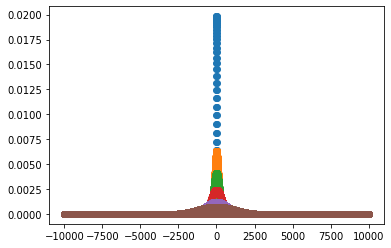

In [7]:
for i, p in enumerate(Pms):
    plt.scatter(np.arange(-Nvalues[i], Nvalues[i]+1), p)

In [45]:
# transition matrix for the Markov chain
def get_transition_matrix_absm(N, beta):
    """
    Get the transition matrix for the system in magnetization space.

    Parameters:
    - N (int): The number of spins in the system.
    - beta (float): The inverse temperature (1/kT) of the system.

    Returns:
    - torch.Tensor: A transition matrix of shape ((N/2)+1, (N/2)+1) representing 
                  the probabilities of transitioning between different magnetization states.
    """
    P = torch.zeros((int(N/2)+1, int(N/2)+1))

    for i in range(0, int(N/2)+1):
        m = i*2/N
        if i == 0:
            P[i, 1] = 1
        else: 
            P[i, i-1] = (1+np.abs(m))/2*np.exp(-2*beta*(np.abs(m)-1/N))
            P[i, i] = 1 - (1+np.abs(m))/2*np.exp(-2*beta*(np.abs(m)-1/N)) - (1-np.abs(m))/2
            if i != N/2:
                P[i, i+1] = (1-np.abs(m))/2
    return P

#Thomas method for solving the system of equations in the form of (A7)

def thomas_solve(A):
    """
    Solves Ax = d where A is a tridiagonal matrix and d is a vector of ones.

    Arguments:
    - A: Tridiagonal matrix (torch tensor of shape (n, n))

    Returns:
    - x: Solution vector
    """
    n = A.shape[0]  # Number of equations

    # Extract the diagonals
    a = torch.zeros(n, dtype=torch.float32)
    b = torch.zeros(n, dtype=torch.float32)
    c = torch.zeros(n, dtype=torch.float32)

    for i in range(n):
        b[i] = A[i, i]  # Main diagonal
        if i > 0:
            a[i] = A[i, i - 1]  # Sub-diagonal
        if i < n - 1:
            c[i] = A[i, i + 1]  # Super-diagonal

    # Right-hand side vector d (all ones)
    d = torch.ones(n, dtype=torch.float32)

    # Temporary storage for modified coefficients
    c_prime = torch.zeros(n, dtype=torch.float32)
    d_prime = torch.zeros(n, dtype=torch.float32)

    # Forward sweep
    c_prime[0] = c[0] / b[0]
    d_prime[0] = d[0] / b[0]

    for i in range(1, n):
        denom = b[i] - a[i] * c_prime[i - 1]
        c_prime[i] = c[i] / denom if i < n - 1 else 0  # c[n-1] is unused
        d_prime[i] = (d[i] - a[i] * d_prime[i - 1]) / denom

    # Back substitution
    x = torch.zeros(n, dtype=torch.float32)
    x[-1] = d_prime[-1]

    for i in range(n - 2, -1, -1):
        x[i] = d_prime[i] - c_prime[i] * x[i + 1]
    

    return x

# gaussian distribution. Since we are interested in the discretized version, we multiply the pdf by Delta m = 2/N
def gaussian_m(m, N):
    """compute the gaussian distribution for a given magnetization m and number of spins N"""
    return np.sqrt(2/N/np.pi)*np.exp(-N*m**2/2)

def large_dev_m(m, N):
    """compute the large deviation function for a given magnetization m and number of spins N"""
    x = (1+m)/2
    return np.exp(-N*(x * np.log(2*x) + (1 - x) * np.log(2*(1 - x))))

In [128]:
N = 500
Neff = int(N/2)
probMADE = compute_Pm(W[1])[::2]
x = probMADE[Neff:]
x[1:] += probMADE[:Neff,][::-1]
probMADE = x

100%|██████████| 500/500 [00:00<00:00, 1294.62it/s]


In [132]:
N = 500
Neff = int(N/2)
probMADE = compute_Pm(W[1])[::2]

100%|██████████| 500/500 [00:00<00:00, 1280.39it/s]


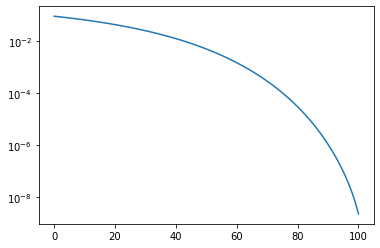

In [138]:
plt.plot(probMADE[N-100:N+101]**0.25)
#plt.plot(np.arange(0,N+1, 2)**4,probMADE)

plt.yscale("log")

In [86]:
probMADE = compute_Pm(W[-3])[::2]

100%|██████████| 2000/2000 [00:06<00:00, 299.29it/s]


/home/delbono/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


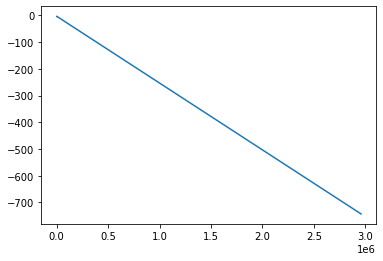

In [92]:
N = 2000
probMADE = gaussian_m(np.arange(0, N+1, 2)/N, N)*2
probMADE[0] = gaussian_m(0, N)
plt.plot(np.arange(0, N+1, 2)**2, np.log(probMADE))

In [50]:
beta = 1.2 # inverse temperature of interest
Nvalues = [100, 500, 1000, 2000] # values of N to consider
#Nvalues = [100, 500, 1000] # values of N to consider

m_max_values = [0.24, 0.18, 0.12, 0.1, 0.06, 0.04] #maximum magnetization for each N


#change depending on whether you want to use the central limit theorem or the large deviation function

all_data = []
for i in range(len(Nvalues)):

    N = Nvalues[i]
    m_max = m_max_values[i]
    m_max = 0.4
    transition_matrix = get_transition_matrix_absm(N, beta)
    
    #### to be verified ####
    Neff = int(N/2)
    probMADE = compute_Pm(W[i])[::2]
    x = probMADE[Neff:]
    x[1:] += probMADE[:Neff,][::-1]
    probMADE = x
    ########################
    
    data = []
    for M in np.arange(2, int(N*m_max), int(N*m_max/20)):
        m = M/N
        nmax = int(N*m/2)

        #first passage time for Metropolis
        P = transition_matrix[:nmax, :nmax]
        fpt_metro = N+(thomas_solve(torch.eye(P.size(0))-P)*probMADE[:nmax]).sum()

        # first passage time for MADE
        cumulative = probMADE[nmax:].sum()
        fpt_made = 1/cumulative*N

        data.append([M, fpt_metro, fpt_made])
    data = np.array(data)
    all_data.append(data)

100%|██████████| 2000/2000 [00:05<00:00, 340.85it/s]


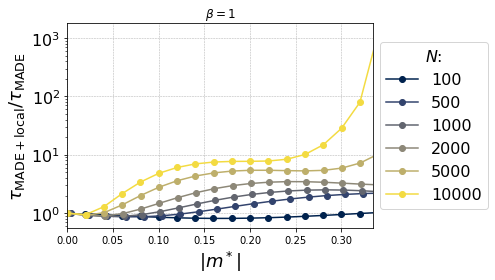

In [157]:
# Plot Fig. 1
plt.figure(figsize=(7, 4))
colors = plt.cm.cividis(np.linspace(0, 0.95, len(all_data)))

for i, (d, color) in enumerate(zip(all_data, colors)):
    plt.plot(d[:, 0] / Nvalues[i]**1, d[:, 1] / d[:, 2], marker='o', label=f"{Nvalues[i]}", color=color)

plt.yscale("log")
#plt.ylim(6*10**(-1),1.3)
plt.xlim(0, 0.335)
plt.xlabel(r'$|m^*|$', fontsize=18)
plt.ylabel(r'$\tau_{\mathrm{MADE+local}} / \tau_{\mathrm{MADE}}$', fontsize=18)  # Corrected to raw string with LaTeX formatting
#plt.xticks([0, 0.05, 0.10, 0.15, 0.20], fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True, ls="--", linewidth=0.5)
plt.legend(title=r"$N$:", title_fontsize=16, fontsize=16, loc="center left", bbox_to_anchor=(1.02, 0.5), borderaxespad=0.)
plt.title(rf"$\beta = {beta}$")
plt.tight_layout()
plt.savefig('fpt_ratio.png')
plt.savefig('fpt_ratio.pdf')
plt.savefig('fpt_ratio.svg')


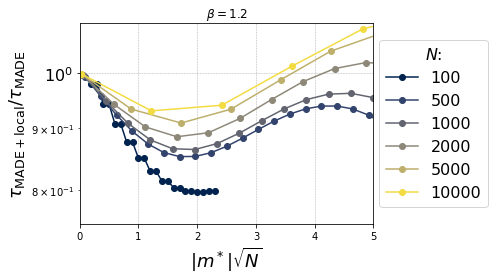

In [146]:
# Plot Fig. 1
plt.figure(figsize=(7, 4))
colors = plt.cm.cividis(np.linspace(0, 0.95, len(all_data)))

for i, (d, color) in enumerate(zip(all_data, colors)):
    plt.plot(d[:, 0] / Nvalues[i]**0.5, d[:, 1] / d[:, 2], marker='o', label=f"{Nvalues[i]}", color=color)

plt.yscale("log")
plt.ylim(7.5*10**(-1),1.1)
plt.xlim(0, 5)
plt.xlabel(r'$|m^*|\sqrt{N}$', fontsize=18)
plt.ylabel(r'$\tau_{\mathrm{MADE+local}} / \tau_{\mathrm{MADE}}$', fontsize=18)  # Corrected to raw string with LaTeX formatting
#plt.xticks([0, 0.05, 0.10, 0.15, 0.20], fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True, ls="--", linewidth=0.5)
plt.legend(title=r"$N$:", title_fontsize=16, fontsize=16, loc="center left", bbox_to_anchor=(1.02, 0.5), borderaxespad=0.)
plt.title(rf"$\beta = {beta}$")
plt.tight_layout()
plt.savefig('fpt_ratio.png')
plt.savefig('fpt_ratio.pdf')
plt.savefig('fpt_ratio.svg')


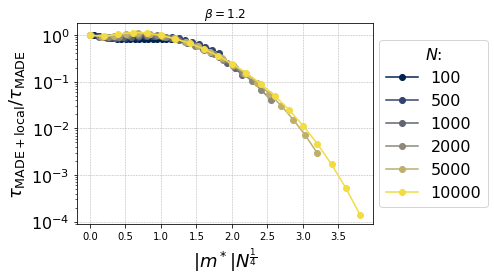

In [153]:
# Plot Fig. 1
plt.figure(figsize=(7, 4))
colors = plt.cm.cividis(np.linspace(0, 0.95, len(all_data)))

for i, (d, color) in enumerate(zip(all_data, colors)):
    plt.plot(d[:, 0] / Nvalues[i]**0.75, d[:, 1] / d[:, 2], marker='o', label=f"{Nvalues[i]}", color=color)

plt.yscale("log")
#plt.ylim(7.5*10**(-1),1.1)
#plt.xlim(0, 1.25)
plt.xlabel(r'$|m^*|N^\frac{1}{4}$', fontsize=18)
plt.ylabel(r'$\tau_{\mathrm{MADE+local}} / \tau_{\mathrm{MADE}}$', fontsize=18)  # Corrected to raw string with LaTeX formatting
#plt.xticks([0, 0.05, 0.10, 0.15, 0.20], fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True, ls="--", linewidth=0.5)
plt.legend(title=r"$N$:", title_fontsize=16, fontsize=16, loc="center left", bbox_to_anchor=(1.02, 0.5), borderaxespad=0.)
plt.title(rf"$\beta = {beta}$")
plt.tight_layout()
plt.savefig('fpt_ratio.png')
plt.savefig('fpt_ratio.pdf')
plt.savefig('fpt_ratio.svg')


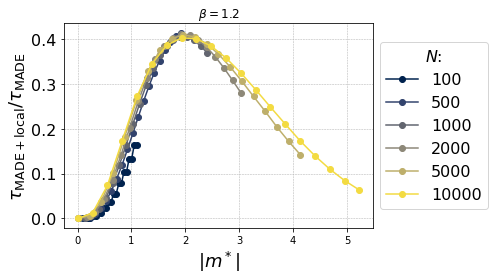

In [64]:
# Plot Fig. 1
plt.figure(figsize=(7, 4))
colors = plt.cm.cividis(np.linspace(0, 0.95, len(all_data)))

for i, (d, color) in enumerate(zip(all_data, colors)):
    plt.plot(d[:, 0] / Nvalues[i]**0.66, (d[:, 1]-Nvalues[i]) / d[:, 2]/ Nvalues[i]**0.05, marker='o', label=f"{Nvalues[i]}", color=color)

#plt.yscale("log")
#plt.ylim(10**(-5),1e-1)
#plt.xlim(0, 0.1)
plt.xlabel(r'$|m^*|$', fontsize=18)
plt.ylabel(r'$\tau_{\mathrm{MADE+local}} / \tau_{\mathrm{MADE}}$', fontsize=18)  # Corrected to raw string with LaTeX formatting
#plt.xticks([0, 0.05, 0.10, 0.15, 0.20], fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True, ls="--", linewidth=0.5)
plt.legend(title=r"$N$:", title_fontsize=16, fontsize=16, loc="center left", bbox_to_anchor=(1.02, 0.5), borderaxespad=0.)
plt.title(rf"$\beta = {beta}$")
plt.tight_layout()

In [150]:
Nvalues = [100, 500, 1000, 2000] # values of N to consider
#Nvalues = [100, 500, 1000] # values of N to consider

m_max_values = [0.24, 0.18, 0.12, 0.1, 0.06, 0.04] #maximum magnetization for each N


#change depending on whether you want to use the central limit theorem or the large deviation function

all_data = []
for i in range(len(Nvalues)):

    beta = 1 + 1/np.sqrt(Nvalues[i])

    N = Nvalues[i]
    m_max = m_max_values[i]
    m_max = 0.4
    transition_matrix = get_transition_matrix_absm(N, beta)
    
    #### to be verified ####
    Neff = int(N/2)
    probMADE = compute_Pm(W[i])[::2]
    x = probMADE[Neff:]
    x[1:] += probMADE[:Neff,][::-1]
    probMADE = x
    ########################
    
    data = []
    for M in np.arange(2, int(N*m_max), int(N*m_max/20)):
        m = M/N
        nmax = int(N*m/2)

        #first passage time for Metropolis
        P = transition_matrix[:nmax, :nmax]
        fpt_metro = N+(thomas_solve(torch.eye(P.size(0))-P)*probMADE[:nmax]).sum()

        # first passage time for MADE
        cumulative = probMADE[nmax:].sum()
        fpt_made = 1/cumulative*N

        data.append([M, fpt_metro, fpt_made])
    data = np.array(data)
    all_data.append(data)

100%|██████████| 100/100 [00:00<00:00, 4933.89it/s]


100%|██████████| 2000/2000 [00:05<00:00, 343.49it/s]


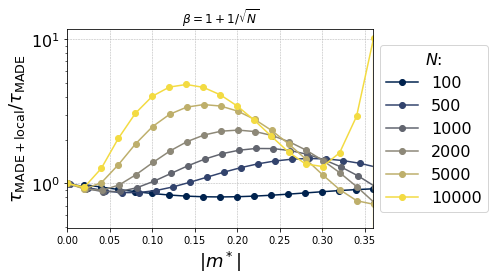

In [113]:
# Plot Fig. 1
plt.figure(figsize=(7, 4))
colors = plt.cm.cividis(np.linspace(0, 0.95, len(all_data)))

for i, (d, color) in enumerate(zip(all_data, colors)):
    plt.plot(d[:, 0] / Nvalues[i]**1, d[:, 1] / d[:, 2], marker='o', label=f"{Nvalues[i]}", color=color)

plt.yscale("log")
#plt.ylim(6*10**(-1),1.3)
plt.xlim(0, 0.36)
plt.xlabel(r'$|m^*|$', fontsize=18)
plt.ylabel(r'$\tau_{\mathrm{MADE+local}} / \tau_{\mathrm{MADE}}$', fontsize=18)  # Corrected to raw string with LaTeX formatting
#plt.xticks([0, 0.05, 0.10, 0.15, 0.20], fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True, ls="--", linewidth=0.5)
plt.legend(title=r"$N$:", title_fontsize=16, fontsize=16, loc="center left", bbox_to_anchor=(1.02, 0.5), borderaxespad=0.)
plt.title(rf"$\beta = 1+1/\sqrt{{N}}$")
plt.tight_layout()
plt.savefig('fpt_ratio.png')
plt.savefig('fpt_ratio.pdf')
plt.savefig('fpt_ratio.svg')

In [49]:
beta = 1.2 # inverse temperature of interest
Nvalues = [100, 500, 1000, 2000, 5000, 10000] # values of N to consider
Nvalues = [100, 500, 1000, 2000, 5000, 10000] # values of N to consider

#Nvalues = [100, 500, 1000] # values of N to consider

m_max_values = [0.24, 0.18, 0.12, 0.1, 0.06, 0.04] #maximum magnetization for each N


#change depending on whether you want to use the central limit theorem or the large deviation function

all_data = []
for i in range(len(Nvalues)):

    N = Nvalues[i]
    m_max = m_max_values[i]
    m_max = 0.2
    transition_matrix = get_transition_matrix_absm(N, beta)
    
    #### to be verified ####
    Neff = int(N/2)
    probMADE = compute_Pm(W[i])[::2]
    x = probMADE[Neff:]
    x[1:] += probMADE[:Neff,][::-1]
    probMADE = x
    ########################
    
    data = []
    for M in np.arange(2, int(N*m_max), int(N*m_max/20)):
        m = M/N
        nmax = int(N*m/2)

        #first passage time for Metropolis
        P = transition_matrix[:nmax, :nmax]
        fpt_metro = (thomas_solve(torch.eye(P.size(0))-P))[0]

        # first passage time for MADE
        cumulative = probMADE[nmax:].sum()
        fpt_made = 1/cumulative*N

        data.append([M, fpt_metro, fpt_made])
    data = np.array(data)
    all_data.append(data)

100%|██████████| 100/100 [00:00<00:00, 4284.67it/s]


100%|██████████| 10000/10000 [02:41<00:00, 61.91it/s]


In [53]:
all_data_noweight = all_data.copy()

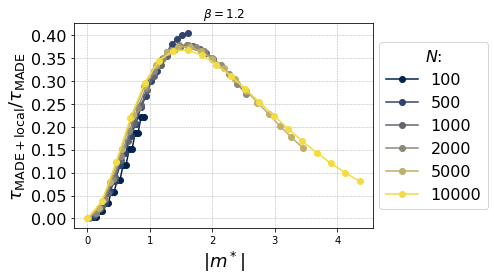

In [66]:
# Plot Fig. 1
plt.figure(figsize=(7, 4))
colors = plt.cm.cividis(np.linspace(0, 0.95, len(all_data_noweight)))

for i, (d, color) in enumerate(zip(all_data_noweight, colors)):
    plt.plot(d[:, 0] / Nvalues[i]**0.66, d[:, 1] / d[:, 2]/ Nvalues[i]**0.2, marker='o', label=f"{Nvalues[i]}", color=color)

#plt.yscale("log")
#plt.ylim(10**(-5),1e-1)
#plt.xlim(0, 0.1)
plt.xlabel(r'$|m^*|$', fontsize=18)
plt.ylabel(r'$\tau_{\mathrm{MADE+local}} / \tau_{\mathrm{MADE}}$', fontsize=18)  # Corrected to raw string with LaTeX formatting
#plt.xticks([0, 0.05, 0.10, 0.15, 0.20], fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True, ls="--", linewidth=0.5)
plt.legend(title=r"$N$:", title_fontsize=16, fontsize=16, loc="center left", bbox_to_anchor=(1.02, 0.5), borderaxespad=0.)
plt.title(rf"$\beta = {beta}$")
plt.tight_layout()

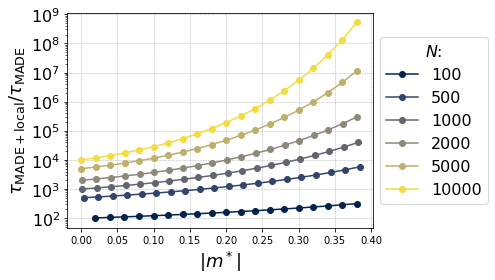

In [84]:
# Plot Fig. 1
plt.figure(figsize=(7, 4))
colors = plt.cm.cividis(np.linspace(0, 0.95, len(all_data)))

for i, (d, color) in enumerate(zip(all_data, colors)):
    plt.plot(d[:, 0] / Nvalues[i]**1, d[:, 2], marker='o', label=f"{Nvalues[i]}", color=color)

plt.yscale("log")
#plt.ylim(8*10**(-1),1.3)
#plt.xlim(0, 7)
plt.xlabel(r'$|m^*|$', fontsize=18)
plt.ylabel(r'$\tau_{\mathrm{MADE+local}} / \tau_{\mathrm{MADE}}$', fontsize=18)  # Corrected to raw string with LaTeX formatting
#plt.xticks([0, 0.05, 0.10, 0.15, 0.20], fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True, ls="--", linewidth=0.5)
plt.legend(title=r"$N$:", title_fontsize=16, fontsize=16, loc="center left", bbox_to_anchor=(1.02, 0.5), borderaxespad=0.)
plt.tight_layout()


In [14]:
beta = 1.2 # inverse temperature of interest
Nvalues = [100, 500, 1000, 2000, 5000, 10000] # values of N to consider
m_max_values = [0.24, 0.18, 0.12, 0.1, 0.06, 0.04] #maximum magnetization for each N


#change depending on whether you want to use the central limit theorem or the large deviation function

all_data2 = []
for i in range(len(Nvalues)):

    N = Nvalues[i]
    m_max = m_max_values[i]
    m_max = 0.7
    transition_matrix = get_transition_matrix_absm(N, beta)
    
    
    data = []
    for M in np.arange(2, int(N*m_max), int(N*m_max/60)):
        m = M/N
        nmax = int(N*m/2)

        #first passage time for Metropolis
        P = transition_matrix[:nmax, :nmax]
        fpt_metro = (thomas_solve(torch.eye(P.size(0))-P))[0]


        data.append([M, fpt_metro])
    data = np.array(data)
    all_data2.append(data)

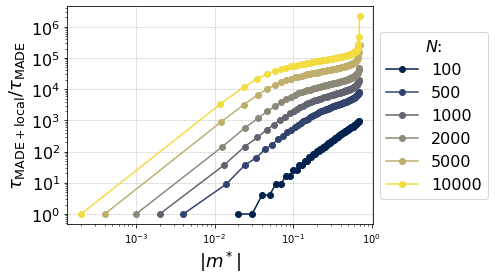

In [85]:
# Plot Fig. 1
plt.figure(figsize=(7, 4))
colors = plt.cm.cividis(np.linspace(0, 0.95, len(all_data)))

for i, (d, color) in enumerate(zip(all_data2, colors)):
    plt.plot(d[:, 0]/Nvalues[i]**1, d[:, 1], marker='o', label=f"{Nvalues[i]}", color=color)

plt.yscale("log")
plt.xscale("log")

#plt.ylim(8*10**(-1),1.3)
#plt.xlim(0, 7)
plt.xlabel(r'$|m^*|$', fontsize=18)
plt.ylabel(r'$\tau_{\mathrm{MADE+local}} / \tau_{\mathrm{MADE}}$', fontsize=18)  # Corrected to raw string with LaTeX formatting
#plt.xticks([0, 0.05, 0.10, 0.15, 0.20], fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True, ls="--", linewidth=0.5)
plt.legend(title=r"$N$:", title_fontsize=16, fontsize=16, loc="center left", bbox_to_anchor=(1.02, 0.5), borderaxespad=0.)
plt.tight_layout()


In [76]:
import math

def comb(n, k):
    """
    Compute the binomial coefficient "n choose k".
    
    Parameters:
    -----------
    n : int
        Total number of items.
    k : int
        Number of items to choose.
        
    Returns:
    --------
    int
        The binomial coefficient.
    """
    if k < 0 or k > n:
        return 0
    return math.factorial(n) // (math.factorial(k) * math.factorial(n - k))

def free_entropy(prob, N, beta, J=1.0):
    """
    Compute the 'free entropy' Phi = -beta * F for the Curie-Weiss model,
    given a discrete probability distribution P(m) for magnetization m.

    Parameters
    ----------
    prob : array-like of length (N+1)
        prob[i] = P(m_i), where m_i = (2*i - N)/N (m runs from -1 to 1 in steps of 2/N).
    N : int
        Number of spins.
    beta : float
        Inverse temperature = 1/(k_B * T). (Assuming k_B=1.)
    J : float, optional
        Coupling constant (default is 1.0).

    Returns
    -------
    Phi : float
        The dimensionless free entropy, Phi = -beta * F.
        (For the equilibrium distribution, this equals ln(Z).)
    """
    if len(prob) != N + 1:
        raise ValueError("Length of prob must be N+1.")
    
    Phi = 0.0
    for i, p in tqdm(enumerate(prob)):
        if p > 0:  # Avoid issues with log(0)
            # Compute magnetization:
            # For index i, total magnetization M = 2*i - N, so m = M/N.
            M = 2 * i - N
            m = M / N

            # Energy E(m) = -J/2 * N * m^2
            E_m = -0.5 * J * N * (m ** 2)

            # Degeneracy Omega(m) = binom(N, (N+M)//2).
            # This formula works when (N+M) is even (as it should be).
            omega = comb(N, (N + M) // 2)

            # Each term in the free entropy:
            #   p * [ ln(omega) - beta * E(m) - ln(p) ]
            Phi += p * ( math.log(omega) - beta * E_m - math.log(p) )
    
    return -Phi/beta



In [79]:
W100 = np.concatenate([np.array([0]),np.loadtxt("couplings_N100_beta1.txt")]) #Need to add the starting 0
prob = compute_Pm(W100)[::2]

100%|██████████| 100/100 [00:00<00:00, 3929.27it/s]


In [88]:
W10000 = np.concatenate([np.array([0]),np.loadtxt("couplings_N10000_beta1.04.txt")[:,1]]) #Need to add the starting 0
prob10000 = compute_Pm(W10000)[::2]

100%|██████████| 10000/10000 [02:26<00:00, 68.12it/s]


In [78]:
N = 100           # Number of spins (for example)
beta = 1.01      # Inverse temperature (T = 1 if k_B=1)

# For illustration, we define a uniform probability distribution over all magnetization sectors.
# For N spins, there are N+1 possible magnetization sectors.

Phi = free_entropy(prob, N, beta, J=1.0)
print("Free Entropy (Phi) =", Phi)

101it [00:00, 53333.09it/s]

Free Entropy (Phi) = -70.1395261079587


In [80]:
N = 100           # Number of spins (for example)
beta = 1      # Inverse temperature (T = 1 if k_B=1)

# For illustration, we define a uniform probability distribution over all magnetization sectors.
# For N spins, there are N+1 possible magnetization sectors.

Phi = free_entropy(prob, N, beta, J=1.0)
print("Free Entropy (Phi) =", Phi)

101it [00:00, 52761.83it/s]

Free Entropy (Phi) = -70.78284822429892


In [90]:
N = 10000           # Number of spins (for example)
beta = 1.04      # Inverse temperature (T = 1 if k_B=1)

# For illustration, we define a uniform probability distribution over all magnetization sectors.
# For N spins, there are N+1 possible magnetization sectors.

Phi = free_entropy(prob10000, N, beta, J=1.0)
print("Free Entropy (Phi) =", Phi)

0it [00:00, ?it/s]

10001it [00:59, 167.81it/s]

Free Entropy (Phi) = -6674.063097253522


# Comparison with the expanded version

In [78]:
Nvalues = np.array([100, 500])
beta = "1"

Wexact = []
Wexp = []

for N in Nvalues:
    Wexact.append(np.concatenate([np.array([0]),np.loadtxt(f"couplings_N{N}_beta{beta}.txt")]))
    #Wexact.append(np.zeros(N))
    Wexp.append(np.concatenate([np.array([0]),np.loadtxt(f"couplings_expansion_N{N}_beta{beta}.txt")[:,1]]))

#prob_exact = compute_Pm(Wexact)[::2]
#prob_exp = compute_Pm(Wexp)[::2]

(0.0, 0.025)

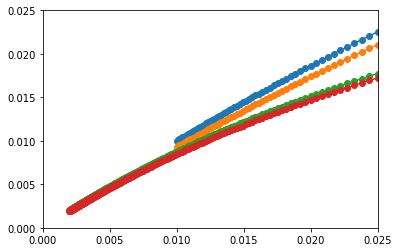

In [30]:
for n in range(len(Nvalues)):
    plt.plot(1/np.arange(1,Nvalues[n]+1), Wexact[n], marker = "o")
    plt.plot(1/np.arange(1,Nvalues[n]+1), Wexp[n],marker = "o")
plt.xlim(0, 0.025)
plt.ylim(0, 0.025)

/home/delbono/.local/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars


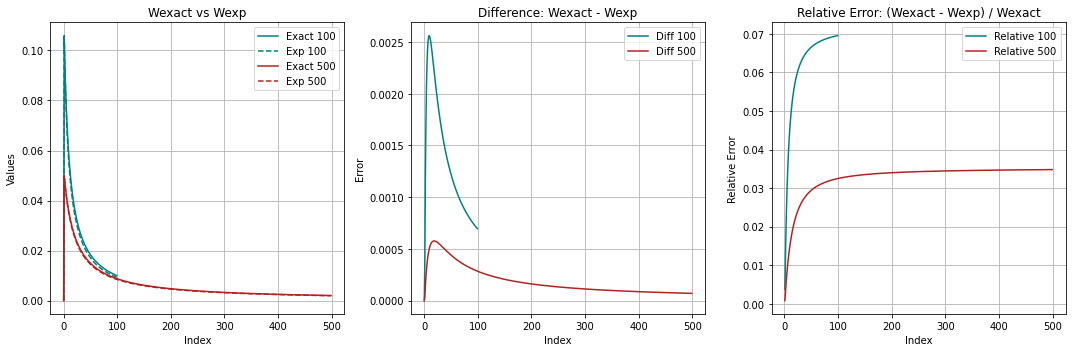

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

colors = ["teal", "firebrick"]

# First plot: Wexact and Wexp
for n in range(len(Nvalues)):
    axes[0].plot(Wexact[n], label=f'Exact {Nvalues[n]}', linestyle='-', color=colors[n])
    axes[0].plot(Wexp[n], label=f'Exp {Nvalues[n]}', linestyle='--', color=colors[n])

axes[0].set_title("Wexact vs Wexp")
axes[0].set_xlabel("Index")
axes[0].set_ylabel("Values")
axes[0].legend()
axes[0].grid(True)

# Second plot: Difference (Error)
for n in range(len(Nvalues)):
    axes[1].plot([a - b for a, b in zip(Wexact[n], Wexp[n])], label=f'Diff {Nvalues[n]}', linestyle='-', color=colors[n])

axes[1].set_title("Difference: Wexact - Wexp")
axes[1].set_xlabel("Index")
axes[1].set_ylabel("Error")
axes[1].legend()
axes[1].grid(True)

# Third plot: Relative Error
for n in range(len(Nvalues)):
    axes[2].plot([(a - b) / a for a, b in zip(Wexact[n], Wexp[n])], label=f'Relative {Nvalues[n]}', linestyle='-', color=colors[n])

axes[2].set_title("Relative Error: (J_exact - J_exp) / J_exact")
axes[2].set_xlabel("Index")
axes[2].set_ylabel("Relative Error")
axes[2].legend()
axes[2].grid(True)

plt.tight_layout()
plt.show()


In [117]:
n = 1
np.argmax(Wexact[n]- Wexp[n])

18

In [122]:
beta = 1.2 # inverse temperature of interest
Nvalues = [100, 500] # values of N to consider
m_max_values = [0.4, 0.4, 0.12, 0.1, 0.06, 0.04] #maximum magnetization for each N


#change depending on whether you want to use the central limit theorem or the large deviation function

all_data_exact = []
for i in range(len(Nvalues)):

    N = Nvalues[i]
    m_max = m_max_values[i]
    transition_matrix = get_transition_matrix_absm(N, beta)
    
    #### to be verified ####
    Neff = int(N/2)
    probMADE = compute_Pm(Wexact[i])[::2]
    x = probMADE[Neff:]
    x[1:] += probMADE[:Neff,][::-1]
    probMADE = x
    ########################
    
    data = []
    for M in np.arange(2, int(N*m_max), int(N*m_max/20)):
        m = M/N
        nmax = int(N*m/2)

        #first passage time for Metropolis
        P = transition_matrix[:nmax, :nmax]
        fpt_metro = N+(thomas_solve(torch.eye(P.size(0))-P)*probMADE[:nmax]).sum()

        # first passage time for MADE
        cumulative = probMADE[nmax:].sum()
        fpt_made = 1/cumulative*N

        data.append([M, fpt_metro, fpt_made])
    data = np.array(data)
    all_data_exact.append(data)


#change depending on whether you want to use the central limit theorem or the large deviation function

all_data_exp = []
for i in range(len(Nvalues)):

    N = Nvalues[i]
    m_max = m_max_values[i]
    transition_matrix = get_transition_matrix_absm(N, beta)
    
    #### to be verified ####
    Neff = int(N/2)
    probMADE = compute_Pm(Wexp[i])[::2]
    x = probMADE[Neff:]
    x[1:] += probMADE[:Neff,][::-1]
    probMADE = x
    ########################
    
    data = []
    for M in np.arange(2, int(N*m_max), int(N*m_max/20)):
        m = M/N
        nmax = int(N*m/2)

        #first passage time for Metropolis
        P = transition_matrix[:nmax, :nmax]
        fpt_metro = N+(thomas_solve(torch.eye(P.size(0))-P)*probMADE[:nmax]).sum()

        # first passage time for MADE
        cumulative = probMADE[nmax:].sum()
        fpt_made = 1/cumulative*N

        data.append([M, fpt_metro, fpt_made])
    data = np.array(data)
    all_data_exp.append(data)

100%|██████████| 500/500 [00:00<00:00, 1365.16it/s]


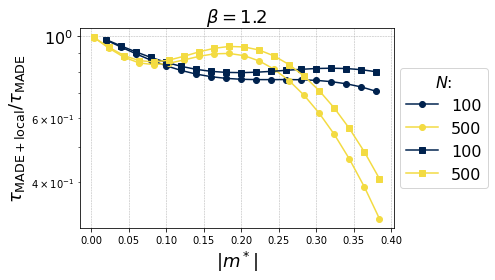

In [123]:
# Plot Fig. 1
plt.figure(figsize=(7, 4))
colors = plt.cm.cividis(np.linspace(0, 0.95, len(all_data_exp)))

for i, (d, color) in enumerate(zip(all_data_exp, colors)):
    plt.plot(d[:, 0] / Nvalues[i]**1, d[:, 1] / d[:, 2], marker='o', label=f"{Nvalues[i]}", color=color)
for i, (d, color) in enumerate(zip(all_data_exact, colors)):
    plt.plot(d[:, 0] / Nvalues[i]**1, d[:, 1] / d[:, 2], marker='s', label=f"{Nvalues[i]}", color=color)

plt.yscale("log")
#plt.ylim(8*10**(-1),1.3)
#plt.xlim(0, 7)
plt.xlabel(r'$|m^*|$', fontsize=18)
plt.ylabel(r'$\tau_{\mathrm{MADE+local}} / \tau_{\mathrm{MADE}}$', fontsize=18)  # Corrected to raw string with LaTeX formatting
#plt.xticks([0, 0.05, 0.10, 0.15, 0.20], fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True, ls="--", linewidth=0.5)
plt.legend(title=r"$N$:", title_fontsize=16, fontsize=16, loc="center left", bbox_to_anchor=(1.02, 0.5), borderaxespad=0.)
plt.title(rf"$\beta = {beta}$", fontsize = 18)
plt.tight_layout()
plt.savefig('fpt_ratio.png')
plt.savefig('fpt_ratio.pdf')
plt.savefig('fpt_ratio.svg')


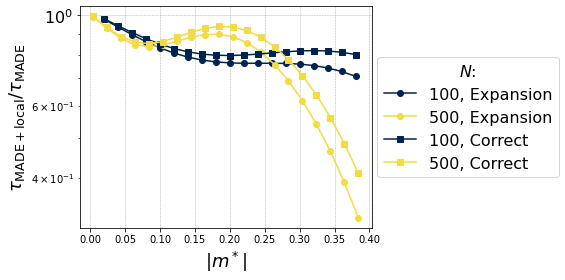

In [126]:
# Plot Fig. 1
plt.figure(figsize=(8, 4))
colors = plt.cm.cividis(np.linspace(0, 0.95, len(all_data_exp)))

for i, (d, color) in enumerate(zip(all_data_exp, colors)):
    plt.plot(d[:, 0] / Nvalues[i]**1, d[:, 1] / d[:, 2], marker='o', label=f"{Nvalues[i]}, Expansion", color=color)
for i, (d, color) in enumerate(zip(all_data_exact, colors)):
    plt.plot(d[:, 0] / Nvalues[i]**1, d[:, 1] / d[:, 2], marker='s', label=f"{Nvalues[i]}, Correct", color=color)

plt.yscale("log")
#plt.ylim(8*10**(-1),1.3)
#plt.xlim(0, 7)
plt.xlabel(r'$|m^*|$', fontsize=18)
plt.ylabel(r'$\tau_{\mathrm{MADE+local}} / \tau_{\mathrm{MADE}}$', fontsize=18)  # Corrected to raw string with LaTeX formatting
#plt.xticks([0, 0.05, 0.10, 0.15, 0.20], fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True, ls="--", linewidth=0.5)
plt.legend(title=r"$N$:", title_fontsize=16, fontsize=16, loc="center left", bbox_to_anchor=(1.02, 0.5), borderaxespad=0.)
plt.tight_layout()
plt.savefig('fpt_ratio.png')
plt.savefig('fpt_ratio.pdf')
plt.savefig('fpt_ratio.svg')


### Numerical check with simulation

In [23]:
import torch

def monte_carlo_update_CW(pop, N, beta):
    """Monte Carlo update model using a checkerboard pattern."""
    population = pop.clone()
    pop_size, N = population.shape
    # Define "even" and "odd" indices for a checkerboard update

    # Update spins in two passes (checkerboard pattern)
    random_indices = torch.randint(0, N, (pop_size,))
    magnetizations = population.mean(1)
    sigmas = population[torch.arange(pop_size), random_indices]
    
    # Compute energy difference for each single-spin flip
    delta_E = -2*(1/N - sigmas*magnetizations)
    # Metropolis acceptance criterion for each spin
    acceptance_prob = torch.exp(-beta * delta_E)
    random_vals = torch.rand(pop_size, device=population.device)
    accept = (delta_E < 0) | (random_vals < acceptance_prob)
    
    # Apply accepted flips only for accepted positions
    population[torch.arange(pop_size), random_indices] = torch.where(accept, -sigmas, sigmas)
    return population

def montecarlo_fpt_abs(N, beta, target_M, pop):
    # Population of spins, randomly initialized to -1 or 1
    pop_size = pop.shape[0]

    # Array to track the time (iteration count) at which each population member reaches the target magnetization
    time_to_target = torch.full((pop_size,), float('inf'), device="cuda")  # Initialized to infinity (not reached yet)

    # Flag to indicate whether each population member has reached the target
    reached_target = torch.zeros(pop_size, dtype=torch.bool, device="cuda")

    # Loop to update the population using the Monte Carlo method
    for i in range(1, 10000):  # Maximum number of iterations
        
        # Perform a Monte Carlo update for the entire population
        pop = monte_carlo_update_CW(pop, N, beta)  
        
        # Calculate magnetization for each population member
        magnetizations = pop.sum(1)  
        
        # Check which members have reached the target magnetization (absolute value comparison)
        newly_reached = (torch.abs(magnetizations) >= target_M) & ~reached_target
        
        # Update the time for newly reached members (only for the first time they reach the target)
        time_to_target[newly_reached] = i
        
        # Mark members as having reached the target
        reached_target |= newly_reached
        
        # Break if all members of the population have reached the target
        #if reached_target.all():
        #    print("All population members have reached the target magnetization.")
        #    break

    # Print or save the times to target
    #print("Time to target for each population member:", time_to_target)
    return time_to_target


In [104]:
model = setup_model(Wexact[-1], N = 500)
pop =  generate_config_fast(model, 500, 10000, None)

In [113]:
montecarlo_fpt_abs(500, 1.2, int(0.184*500), pop).mean()

tensor(526.1689, device='cuda:0')

In [109]:
d[:, 0] / Nvalues[i]**1

array([0.004, 0.024, 0.044, 0.064, 0.084, 0.104, 0.124, 0.144, 0.164,
       0.184, 0.204, 0.224, 0.244, 0.264, 0.284, 0.304, 0.324, 0.344,
       0.364, 0.384])

In [114]:
d[9, :]-500

array([-408.        ,  523.25270626,  589.50714521])

# Check on the alternated procedure

In [113]:
import torch

def monte_carlo_update_CW(pop, N, beta):
    """Monte Carlo update model using a checkerboard pattern."""
    population = pop.clone()
    pop_size, N = population.shape
    # Define "even" and "odd" indices for a checkerboard update

    # Update spins in two passes (checkerboard pattern)
    random_indices = torch.randint(0, N, (pop_size,))
    magnetizations = population.mean(1)
    sigmas = population[torch.arange(pop_size), random_indices]
    
    # Compute energy difference for each single-spin flip
    delta_E = -2*(1/N - sigmas*magnetizations)
    # Metropolis acceptance criterion for each spin
    acceptance_prob = torch.exp(-beta * delta_E)
    random_vals = torch.rand(pop_size, device=population.device)
    accept = (delta_E < 0) | (random_vals < acceptance_prob)
    
    # Apply accepted flips only for accepted positions
    population[torch.arange(pop_size), random_indices] = torch.where(accept, -sigmas, sigmas)
    return population

def MLMC_fast(model, data, beta, N,  num_steps = 10, return_correlations = False):
    # NOTA: le correlazioni sono calcolate usando come riferimento il primo campione
    # Non sono mediate sui tempi!
    #Se il primo campione è all'equilibrio, non ci sono problemi
    acc_rates = []
    if return_correlations:
        correlations = [1]
    with torch.no_grad():
        bce = nn.BCELoss(reduction = "none")
        current_config = data.clone()
        for t in range(num_steps):
            new_config = generate_config_fast(model, N, len(data), None)
            
            current_energy = -N*current_config.mean(1)**2/2
            current_probability = torch.sum(bce(model(current_config), (current_config+1)/2), axis = 1)

            new_energy = -N*new_config.mean(1)**2/2
            new_probability = torch.sum(bce(model(new_config), (new_config+1)/2), axis = 1)

            arg_new = -beta*new_energy + new_probability
            arg_current = -beta*current_energy + current_probability

            acceptances = (torch.log(torch.rand(size=(len(data),), device = "cuda")) < (arg_new-arg_current)).int()
            current_config = torch.einsum("i, ij->ij",(1-acceptances),current_config) + torch.einsum("i, ij->ij",acceptances, new_config)
            torch.cuda.empty_cache()
            acc_rates.append(torch.sum(acceptances)/len(data))
            if return_correlations:
                correlations.append(float(torch.mean(data*current_config) - torch.mean(data)*torch.mean(current_config)))
    if return_correlations:
        return current_config, acc_rates, correlations
    else:
        return current_config, acc_rates

def montecarlo_alternated_abs(N, beta, target_M, model, pop_size = 10000, k = 1):
    # Population of spins, randomly initialized to -1 or 1
    pop =  generate_config_fast(model, N, pop_size, None)

    over = False

    # Array to track the time (iteration count) at which each population member reaches the target magnetization
    time_to_target = torch.full((pop_size,), float('inf'), device="cuda")  # Initialized to infinity (not reached yet)

    # Flag to indicate whether each population member has reached the target
    reached_target = torch.zeros(pop_size, dtype=torch.bool, device="cuda")

    magnetizations = pop.sum(1)  
        
    # Check which members have reached the target magnetization (absolute value comparison)
    newly_reached = (torch.abs(magnetizations) >= target_M) & ~reached_target
    
    # Update the time for newly reached members (only for the first time they reach the target)
    time_to_target[newly_reached] = N
    # Mark members as having reached the target
    reached_target |= newly_reached

    # Loop to update the population using the Monte Carlo method
    for global_step in range(0, 1000):  # Maximum number of iterations
        #pop, _ = MLMC_fast(model, pop, beta, N,  num_steps = 1)
        # Calculate magnetization for each population member
        magnetizations = pop.sum(1)  
        
        # Check which members have reached the target magnetization (absolute value comparison)
        newly_reached = (torch.abs(magnetizations) >= target_M) & ~reached_target
        
        # Update the time for newly reached members (only for the first time they reach the target)
        time_to_target[newly_reached] = N+N+global_step*(N+N*k)
        
        # Mark members as having reached the target
        reached_target |= newly_reached
        
        # Break if all members of the population have reached the target
        if reached_target.all():
            print("All population members have reached the target magnetization.")
            over = True
            break
        
        # Perform a Monte Carlo update for the entire population
        for i in range(N*k):
            pop = monte_carlo_update_CW(pop, N, beta)  
        
        # Calculate magnetization for each population member
            magnetizations = pop.sum(1)  
        
        # Check which members have reached the target magnetization (absolute value comparison)
            newly_reached = (torch.abs(magnetizations) >= target_M) & ~reached_target
        
        # Update the time for newly reached members (only for the first time they reach the target)
            time_to_target[newly_reached] = i+N+global_step*(N+N*k)
            time_to_target[newly_reached] = i+global_step*(N*k)
        
        # Mark members as having reached the target
            reached_target |= newly_reached
        
        # Break if all members of the population have reached the target
            if reached_target.all():
                print("All population members have reached the target magnetization.")
                over = True
                break
        if over:
            break

    # Print or save the times to target
    #print("Time to target for each population member:", time_to_target)
    return time_to_target


In [83]:
def monte_carlo_update_CW(pop, N, beta):
    """Monte Carlo update model using a checkerboard pattern."""
    population = pop.clone()
    pop_size, N = population.shape
    # Define "even" and "odd" indices for a checkerboard update

    # Update spins in two passes (checkerboard pattern)
    random_indices = torch.randint(0, N, (pop_size,))
    magnetizations = population.mean(1)
    sigmas = population[torch.arange(pop_size), random_indices]
    
    # Compute energy difference for each single-spin flip
    delta_E = -2*(1/N - sigmas*magnetizations)
    # Metropolis acceptance criterion for each spin
    acceptance_prob = torch.exp(-beta * delta_E)
    random_vals = torch.rand(pop_size, device=population.device)
    accept = (delta_E < 0) | (random_vals < acceptance_prob)
    
    # Apply accepted flips only for accepted positions
    population[torch.arange(pop_size), random_indices] = torch.where(accept, -sigmas, sigmas)
    return population

def montecarlo_tries_abs(N, beta, target_M, model, pop_size = 10000, k = 1):
    # Population of spins, randomly initialized to -1 or 1
    pop =  generate_config_fast(model, N, pop_size, None)

    # Array to track the time (iteration count) at which each population member reaches the target magnetization
    time_to_target = torch.full((pop_size,), float('inf'), device="cuda")  # Initialized to infinity (not reached yet)

    # Flag to indicate whether each population member has reached the target
    reached_target = torch.zeros(pop_size, dtype=torch.bool, device="cuda")

    # Loop to update the population using the Monte Carlo method
    for i in range(0, N*k):  # Maximum number of iterations
        
        # Perform a Monte Carlo update for the entire population
        pop = monte_carlo_update_CW(pop, N, beta)  
        
        # Calculate magnetization for each population member
        magnetizations = pop.sum(1)  
        
        # Check which members have reached the target magnetization (absolute value comparison)
        newly_reached = (torch.abs(magnetizations) >= target_M) & ~reached_target
        
        # Update the time for newly reached members (only for the first time they reach the target)
        time_to_target[newly_reached] = i
        
        # Mark members as having reached the target
        reached_target |= newly_reached
        
        # Break if all members of the population have reached the target
        #if reached_target.all():
        #    print("All population members have reached the target magnetization.")
        #    break

    # Print or save the times to target
    #print("Time to target for each population member:", time_to_target)
    return reached_target

def montecarlo_tries_abs(N, beta, target_M, model, pop_size = 10000, k = 1):
    # Population of spins, randomly initialized to -1 or 1
    over = False
    # Array to track the time (iteration count) at which each population member reaches the target magnetization
    time_to_target = torch.full((pop_size,), float('inf'), device="cuda")  # Initialized to infinity (not reached yet)

    # Flag to indicate whether each population member has reached the target
    reached_target = torch.zeros(pop_size, dtype=torch.bool, device="cuda")

    # Loop to update the population using the Monte Carlo method
    for global_step in range(0, 1000):  # Maximum number of iterations
        pop =  generate_config_fast(model, N, pop_size, None)
        # Update the time for newly reached members (only for the first time they reach the target)
        magnetizations = pop.sum(1)  
        newly_reached = (torch.abs(magnetizations) >= target_M) & ~reached_target
        time_to_target[newly_reached] =N+global_step*(N+N*k)
        # Mark members as having reached the target
        reached_target |= newly_reached
        if reached_target.all():
            print("All population members have reached the target magnetization.")
            over = True
            break

        for i in range(N*k):
            # Perform a Monte Carlo update for the entire population
            pop = monte_carlo_update_CW(pop, N, beta)  
            
            # Calculate magnetization for each population member
            magnetizations = pop.sum(1)  
            
            # Check which members have reached the target magnetization (absolute value comparison)
            newly_reached = (torch.abs(magnetizations) >= target_M) & ~reached_target
            
            # Update the time for newly reached members (only for the first time they reach the target)
            time_to_target[newly_reached] = i+N+global_step*(N+N*k)
            
            # Mark members as having reached the target
            reached_target |= newly_reached
        
         #Break if all members of the population have reached the target
            if reached_target.all():
                print("All population members have reached the target magnetization.")
                over = True
                break
        if over:
            break

    # Print or save the times to target
    #print("Time to target for each population member:", time_to_target)
    return time_to_target

In [4]:
W = np.concatenate([np.array([0]),np.loadtxt("couplings_N100_beta1.txt")]) #Need to add the starting 0
model_B1 = setup_model(W)

In [44]:
beta = 1.2 # inverse temperature of interest
Nvalues = [100, 500, 1000, 2000] # values of N to consider
#Nvalues = [100, 500, 1000] # values of N to consider

m_max_values = [0.24, 0.18, 0.12, 0.1, 0.06, 0.04] #maximum magnetization for each N


#change depending on whether you want to use the central limit theorem or the large deviation function

all_data = []
for i in range(len(Nvalues)):

    N = Nvalues[i]
    m_max = m_max_values[i]
    m_max = 0.4
    transition_matrix = get_transition_matrix_absm(N, beta)
    
    #### to be verified ####
    Neff = int(N/2)
    probMADE = compute_Pm(W[i])[::2]
    x = probMADE[Neff:]
    x[1:] += probMADE[:Neff,][::-1]
    probMADE = x
    ########################
    
    data = []
    for M in np.arange(2, int(N*m_max), int(N*m_max/20)):
        m = M/N
        nmax = int(N*m/2)

        #first passage time for Metropolis
        P = transition_matrix[:nmax, :nmax]
        fpt_metro = N+(thomas_solve(torch.eye(P.size(0))-P)*probMADE[:nmax]).sum()

        # first passage time for MADE
        cumulative = probMADE[nmax:].sum()
        fpt_made = 1/cumulative*N

        data.append([M, fpt_metro, fpt_made])
    data = np.array(data)
    all_data.append(data)

NameError: name 'get_transition_matrix_absm' is not defined

In [100]:
montecarlo_tries_abs(N, beta, 34, model_B1, k=10).mean()

All population members have reached the target magnetization.


tensor(235.3014, device='cuda:0')

In [116]:
montecarlo_alternated_abs(N, beta, 34, model_B1, k=10000).mean()

All population members have reached the target magnetization.


tensor(176.3644, device='cuda:0')

In [67]:
N = 100
M = 30
beta = 1.1
k = 1
N*10000/montecarlo_tries_abs(N, beta, M, model_B1, k=k).sum()

tensor(139.7624, device='cuda:0')

In [55]:
all_data

[array([[  2.        , 100.01983593, 102.02373597],
        [  4.        , 100.20168634, 106.32501158],
        [  6.        , 100.71342148, 110.99740907],
        [  8.        , 101.72403608, 116.08552471],
        [ 10.        , 103.39845586, 121.64107534],
        [ 12.        , 105.89266628, 127.72426565],
        [ 14.        , 109.34944936, 134.40546825],
        [ 16.        , 113.89497486, 141.76729899],
        [ 18.        , 119.63641045, 149.9071956 ],
        [ 20.        , 126.66066216, 158.94064083],
        [ 22.        , 135.03425265, 169.00521676],
        [ 24.        , 144.80430268, 180.26573885],
        [ 26.        , 156.00048334, 192.92080288],
        [ 28.        , 168.63779905, 207.21119578],
        [ 30.        , 182.72000904, 223.43078576],
        [ 32.        , 198.24350192, 241.94073922],
        [ 34.        , 215.20152317, 263.18824387],
        [ 36.        , 233.5883953 , 287.73139524],
        [ 38.        , 253.40398338, 316.27260165]])]

In [31]:
montecarlo_fpt_abs(N, beta, 30, generate_config_fast(model_B1, N, 10000, None)).mean()

tensor(82.1995, device='cuda:0')

## The true case

In [ ]:
import torch

def monte_carlo_update_CW(pop, N, beta):
    """Monte Carlo update model using a checkerboard pattern."""
    population = pop.clone()
    pop_size, N = population.shape
    # Define "even" and "odd" indices for a checkerboard update

    # Update spins in two passes (checkerboard pattern)
    random_indices = torch.randint(0, N, (pop_size,))
    magnetizations = population.mean(1)
    sigmas = population[torch.arange(pop_size), random_indices]
    
    # Compute energy difference for each single-spin flip
    delta_E = -2*(1/N - sigmas*magnetizations)
    # Metropolis acceptance criterion for each spin
    acceptance_prob = torch.exp(-beta * delta_E)
    random_vals = torch.rand(pop_size, device=population.device)
    accept = (delta_E < 0) | (random_vals < acceptance_prob)
    
    # Apply accepted flips only for accepted positions
    population[torch.arange(pop_size), random_indices] = torch.where(accept, -sigmas, sigmas)
    return population

def MLMC_fast(model, data, beta, N,  num_steps = 10, return_correlations = False):
    # NOTA: le correlazioni sono calcolate usando come riferimento il primo campione
    # Non sono mediate sui tempi!
    #Se il primo campione è all'equilibrio, non ci sono problemi
    acc_rates = []
    if return_correlations:
        correlations = [1]
    with torch.no_grad():
        bce = nn.BCELoss(reduction = "none")
        current_config = data.clone()
        for t in range(num_steps):
            new_config = generate_config_fast(model, N, len(data), None)
            
            current_energy = -N*current_config.mean(1)**2/2
            current_probability = torch.sum(bce(model(current_config), (current_config+1)/2), axis = 1)

            new_energy = -N*new_config.mean(1)**2/2
            new_probability = torch.sum(bce(model(new_config), (new_config+1)/2), axis = 1)

            arg_new = -beta*new_energy + new_probability
            arg_current = -beta*current_energy + current_probability

            acceptances = (torch.log(torch.rand(size=(len(data),), device = "cuda")) < (arg_new-arg_current)).int()
            current_config = torch.einsum("i, ij->ij",(1-acceptances),current_config) + torch.einsum("i, ij->ij",acceptances, new_config)
            torch.cuda.empty_cache()
            acc_rates.append(torch.sum(acceptances)/len(data))
            if return_correlations:
                correlations.append(float(torch.mean(data*current_config) - torch.mean(data)*torch.mean(current_config)))
    if return_correlations:
        return current_config, acc_rates, correlations
    else:
        return current_config, acc_rates
    

def montecarlo_alternated_abs(N, beta, target_M, model, pop_size = 10000, k = 1):
    # Population of spins, randomly initialized to -1 or 1
    pop =  generate_config_fast(model, N, pop_size, None)

    over = False

    # Array to track the time (iteration count) at which each population member reaches the target magnetization
    time_to_target = torch.full((pop_size,), float('inf'), device="cuda")  # Initialized to infinity (not reached yet)

    # Flag to indicate whether each population member has reached the target
    reached_target = torch.zeros(pop_size, dtype=torch.bool, device="cuda")

    magnetizations = pop.sum(1)  
        
    # Check which members have reached the target magnetization (absolute value comparison)
    newly_reached = (torch.abs(magnetizations) >= target_M) & ~reached_target
    
    # Update the time for newly reached members (only for the first time they reach the target)
    time_to_target[newly_reached] = N
    # Mark members as having reached the target
    reached_target |= newly_reached

    # Loop to update the population using the Monte Carlo method
    for global_step in range(0, 1000):  # Maximum number of iterations
        #pop, _ = MLMC_fast(model, pop, beta, N,  num_steps = 1)
        # Calculate magnetization for each population member
        magnetizations = pop.sum(1)  
        
        # Check which members have reached the target magnetization (absolute value comparison)
        newly_reached = (torch.abs(magnetizations) >= target_M) & ~reached_target
        
        # Update the time for newly reached members (only for the first time they reach the target)
        time_to_target[newly_reached] = N+N+global_step*(N+N*k)
        
        # Mark members as having reached the target
        reached_target |= newly_reached
        
        # Break if all members of the population have reached the target
        if reached_target.all():
            print("All population members have reached the target magnetization.")
            over = True
            break
        
        # Perform a Monte Carlo update for the entire population
        for i in range(N*k):
            pop = monte_carlo_update_CW(pop, N, beta)  
        
        # Calculate magnetization for each population member
            magnetizations = pop.sum(1)  
        
        # Check which members have reached the target magnetization (absolute value comparison)
            newly_reached = (torch.abs(magnetizations) >= target_M) & ~reached_target
        
        # Update the time for newly reached members (only for the first time they reach the target)
            time_to_target[newly_reached] = i+N+global_step*(N+N*k)
            time_to_target[newly_reached] = i+global_step*(N*k)
        
        # Mark members as having reached the target
            reached_target |= newly_reached
        
        # Break if all members of the population have reached the target
            if reached_target.all():
                print("All population members have reached the target magnetization.")
                over = True
                break
        if over:
            break

    # Print or save the times to target
    #print("Time to target for each population member:", time_to_target)
    return time_to_target


In [73]:
def update_status(pop, target_M, current_time, reached_target, time_to_target):
    """
    Update the status for each population member.
    
    Parameters:
        pop (Tensor): The population of spins (each row is a configuration).
        target_M (int or float): The target magnetization (absolute value).
        current_time (int or float): The simulation time corresponding to this update.
        reached_target (Tensor): A boolean tensor marking which members have already reached the target.
        time_to_target (Tensor): A tensor storing the first time a member reached the target magnetization.
    
    Returns:
        reached_target, time_to_target: Updated tensors.
    """
    # Compute magnetization per configuration (sum over spins)
    magnetizations = pop.sum(dim=1)
    # Find indices that have reached the target (by absolute value) for the first time
    newly_reached = (torch.abs(magnetizations) >= target_M) & ~reached_target
    # Record the time at which these configurations reached the target
    time_to_target[newly_reached] = current_time
    # Mark these members as having reached the target
    reached_target |= newly_reached
    return reached_target, time_to_target


def montecarlo_alternated_abs(N, beta, target_M, model, pop_size=10000, k=1):
    """
    Run a Monte Carlo simulation on a population of spin configurations until each member reaches a target magnetization.
    
    Parameters:
        N (int): Number of spins per configuration.
        beta (float): Inverse temperature parameter for the Monte Carlo update.
        target_M (int or float): The target (absolute) magnetization.
        model: The physical model (used by generate_config_fast and monte_carlo_update_CW).
        pop_size (int): Number of configurations in the population.
        k (int): Parameter controlling the number of Monte Carlo update steps in the inner loop.
        
    Returns:
        Tensor: An array with the simulation time at which each population member first reached the target magnetization.
    """
    # Initialize the population of spins (each spin is -1 or 1)
    
    #pop = generate_config_fast(model, N, pop_size, None)
    #current_time = N
    pop = torch.cat([torch.ones((pop_size, N // 2), device="cuda"), -torch.ones((pop_size, N // 2), device="cuda")], dim=1)
    current_time = 0
    
    # Initialize time-to-target for each member to infinity
    time_to_target = torch.full((pop_size,), float('inf'), device="cuda")
    
    # Boolean tensor to track which members have reached the target magnetization
    reached_target = torch.zeros(pop_size, dtype=torch.bool, device="cuda")
    
    # Start the simulation "clock" at time = N (e.g. after one sweep of updates)
    reached_target, time_to_target = update_status(pop, target_M, current_time, reached_target, time_to_target)
    
    max_global_steps = 1000  # maximum number of outer iterations
    for global_step in range(max_global_steps):
        # Outer update: simulate a full sweep (N steps) and update the clock
        pop, _ = MLMC_fast(model, pop, beta, N,  num_steps = 1)
        current_time += N
        reached_target, time_to_target = update_status(pop, target_M, current_time, reached_target, time_to_target)
        if reached_target.all():
            #print("All population members have reached the target magnetization.")
            break
        
        # Inner loop: perform N*k Monte Carlo updates (each update increments the simulation time)
        for i in range(N * k):
            pop = monte_carlo_update_CW(pop, N, beta)
            current_time += 1
            reached_target, time_to_target = update_status(pop, target_M, current_time, reached_target, time_to_target)
            if reached_target.all():
                #print("All population members have reached the target magnetization.")
                break
        else:
            # Continue to the next global step if inner loop completed without breaking
            continue
        # Break the outer loop if inner loop terminated early
        break
    
    return time_to_target


In [79]:
N =1000
WW = np.concatenate([np.array([0]),np.loadtxt(f"couplings_N{N}_beta1.txt")[:,-1]]) #Need to add the starting 0
model_B1 = setup_model(WW, N = N)
beta = 1.2

In [83]:
#beta = 1+1/np.sqrt(N)
tot_sum = 0
for n in tqdm(range(1)):
    tot_sum += montecarlo_alternated_abs(N, beta, 182, model_B1, k=1).mean()
tot_sum/1

100%|██████████| 1/1 [00:06<00:00,  6.75s/it]


tensor(2478.9539, device='cuda:0')

In [ ]:
idx = -2
beta = 1

result_mix = []
for i, M in enumerate(all_data[idx][:,0]):
    time1 = float(montecarlo_alternated_abs(N, beta, M, model_B1, k=1).mean())
    time2 = all_data[idx][i,1]
    time3 = all_data[idx][i,2]
    print(M, M/N, time1, time2, time1/time2, time1/time3, time3/time2)
    result_mix.append([M,time1,time2, time3])
result_mix = np.array(result_mix)

2.0 0.002 1000.0046997070312 1000.0040889992464 1.0000006107052877 0.9959156812434887 1.0041016820386828
22.0 0.022 1007.310546875 1007.2304910194233 1.0000794811677074 0.9209464036515477 1.0859258228300772
42.0 0.042 1051.173828125 1048.6591600879735 1.0023979841427366 0.8759747322977959 1.1443229435549083
62.0 0.062 1167.960205078125 1146.647757079471 1.0185867437206149 0.8803900882542938 1.1569720710285918
82.0 0.082 1329.854248046875 1309.2598297629497 1.0157298175776568 0.8993486342990155 1.1294060821800804
102.0 0.102 1513.908447265625 1530.3815813092203 0.9892359302772693 0.9105029109626079 1.0864720127379084
122.0 0.122 1727.4669189453125 1794.6933770365472 0.9625415355339189 0.9152312476294108 1.0516921685388791
142.0 0.142 1989.1256103515625 2084.3328066140302 0.9543224594650359 0.9188991675073471 1.0385497051366146
162.0 0.162 2193.26904296875 2384.180692356431 0.9199256792911148 0.8736716449268622 1.0529421260639913
182.0 0.182 2500.104248046875 2684.3233686349913 0.9313722

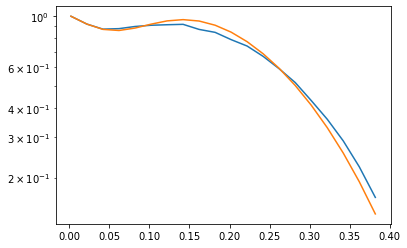

In [87]:
plt.plot(result_mix[:,0]/N, result_mix[:,1]/result_mix[:,3])
plt.plot(result_mix[:,0]/N, result_mix[:,2]/result_mix[:,3])
plt.yscale("log")

In [ ]:
all_data[-2]

array([[2.00000000e+00, 1.00000409e+03, 1.00410579e+03],
       [2.20000000e+01, 1.00723049e+03, 1.09377760e+03],
       [4.20000000e+01, 1.04865916e+03, 1.20000474e+03],
       [6.20000000e+01, 1.14664776e+03, 1.32663943e+03],
       [8.20000000e+01, 1.30925983e+03, 1.47868601e+03],
       [1.02000000e+02, 1.53038158e+03, 1.66271676e+03],
       [1.22000000e+02, 1.79469338e+03, 1.88746497e+03],
       [1.42000000e+02, 2.08433281e+03, 2.16468322e+03],
       [1.62000000e+02, 2.38418069e+03, 2.51040429e+03],
       [1.82000000e+02, 2.68432337e+03, 2.94682447e+03],
       [2.02000000e+02, 2.97997319e+03, 3.50516646e+03],
       [2.22000000e+02, 3.27003012e+03, 4.23011426e+03],
       [2.42000000e+02, 3.55541095e+03, 5.18682518e+03],
       [2.62000000e+02, 3.83780862e+03, 6.47226283e+03],
       [2.82000000e+02, 4.11899185e+03, 8.23395552e+03],
       [3.02000000e+02, 4.40055273e+03, 1.07018568e+04],
       [3.22000000e+02, 4.68389008e+03, 1.42439987e+04],
       [3.42000000e+02, 4.97029

In [99]:
Nvalues = [100, 500, 1000, 2000, 5000, 10000] # values of N to consider
#Nvalues = [100, 500, 1000] # values of N to consider

m_max_values = [0.24, 0.18, 0.12, 0.1, 0.06, 0.04] #maximum magnetization for each N


#change depending on whether you want to use the central limit theorem or the large deviation function

all_data = []
for i in range(len(Nvalues)):

    beta = 1+ 1/np.sqrt(N)

    N = Nvalues[i]
    m_max = m_max_values[i]
    m_max = 0.4
    transition_matrix = get_transition_matrix_absm(N, beta)
    
    #### to be verified ####
    Neff = int(N/2)
    probMADE = compute_Pm(W[i])[::2]
    x = probMADE[Neff:]
    x[1:] += probMADE[:Neff,][::-1]
    probMADE = x
    ########################
    
    data = []
    for M in np.arange(2, int(N*m_max), int(N*m_max/20)):
        m = M/N
        nmax = int(N*m/2)

        #first passage time for Metropolis
        P = transition_matrix[:nmax, :nmax]
        fpt_metro = N+(thomas_solve(torch.eye(P.size(0))-P)*probMADE[:nmax]).sum()

        # first passage time for MADE
        cumulative = probMADE[nmax:].sum()
        fpt_made = 1/cumulative*N

        data.append([M, fpt_metro, fpt_made])
    data = np.array(data)
    all_data.append(data)

 48%|████▊     | 238/500 [00:00<00:00, 2363.00it/s]

100%|██████████| 10000/10000 [02:24<00:00, 69.05it/s]


In [100]:
N =10000
WW = np.concatenate([np.array([0]),np.loadtxt(f"couplings_N{N}_beta1.txt")[:,-1]]) #Need to add the starting 0
model_B1 = setup_model(WW, N = N)

In [102]:
idx = -1
beta = 1+ 1/np.sqrt(N)

result_mix = []
for i, M in enumerate(all_data[idx][:10,0]):
    time1 = float(montecarlo_alternated_abs(N, beta, M, model_B1, k=1).mean())
    time2 = all_data[idx][i,1]
    time3 = all_data[idx][i,2]
    print(M, M/N, time1, time2, time1/time2, time1/time3, time3/time2)
    result_mix.append([M,time1,time2, time3])
result_mix = np.array(result_mix)

2.0 0.0002 10000.0009765625 10000.000734410432 1.000000024215205 0.9992656871522501 1.0007348766923516
202.0 0.0202 11108.2666015625 11009.662433142761 1.008956148203319 0.9476997894902223 1.0646368812069136
402.0 0.0402 14764.0302734375 17746.37866083775 0.8319460863313134 1.0504629418847675 0.7919804242105052
602.0 0.0602 19669.48046875 34697.157936312666 0.5668902480385779 1.137727200503269 0.4982655313047067
802.0 0.0802 26443.6796875 63945.51414393363 0.4135345542453294 1.2124128437855106 0.3410839437778905
1002.0 0.1002 36082.83203125 107011.14715060365 0.3371876014044436 1.2658050797355584 0.2663819309959524
1202.0 0.1202 49459.09375 162010.44005637598 0.30528337391583743 1.2873417849253492 0.23714244149508465
1402.0 0.1402 68479.3359375 228348.01123770268 0.2998902226751399 1.2749927189764358 0.2352093609725801
1602.0 0.1602 96972.828125 305936.85661853943 0.3169700741415134 1.2403894443644006 0.2555407703456675
1802.0 0.1802 138487.421875 396516.8623263715 0.3492598550853344 1

In [ ]:
#np.savetxt("fpt_ratio_N10000_beta1.txt", result_mix)

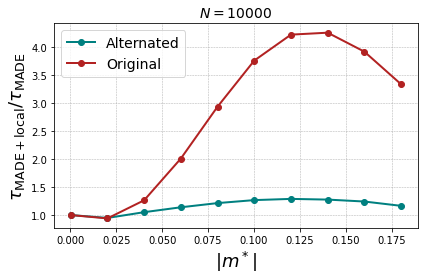

In [115]:
#plt.yscale("log")
plt.xlabel(r'$|m^*|$', fontsize=18)
plt.ylabel(r"$\tau_{\mathrm{MADE+local}} / \tau_{\mathrm{MADE}}$", fontsize=18)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.plot(result_mix[:,0]/N, result_mix[:,1]/result_mix[:,3], marker = "o", ls = "-", label='Alternated', color='teal', linewidth=2)
plt.plot(result_mix[:,0]/N, result_mix[:,2]/result_mix[:,3], marker = "o", ls = "-", label='Original', color='firebrick', linewidth=2)
plt.title(r"$N = 10000$", fontsize=14)
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()

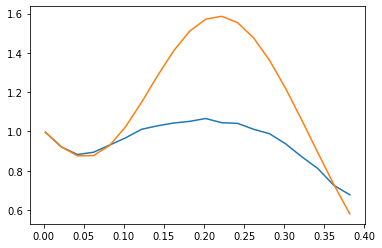

In [98]:
plt.plot(result_mix[:,0]/N, result_mix[:,1]/result_mix[:,3])
plt.plot(result_mix[:,0]/N, result_mix[:,2]/result_mix[:,3])
#plt.yscale("log")

In [235]:
N =2000
WW = np.concatenate([np.array([0]),np.loadtxt(f"couplings_N{N}_beta1.txt")[:,1]]) #Need to add the starting 0
model_B1 = setup_model(WW, N = N)
beta = 1

In [238]:
result_mix = []
for M in np.arange(2, 400, 60):
    time1 = float(montecarlo_alternated_abs(N, beta, M, model_B1, k=1).mean())
    time2 = float(montecarlo_alternated_abs(N, beta, M, model_B1, k=0).mean())
    time3 = float(montecarlo_alternated_abs(N, beta, M, model_B1, k=10000).mean())
    print(M, M/N, time1, time2, time1/time2, time1/time3, time3/time2)
    result_mix.append([M,time1,time2, time3])
result_mix = np.array(result_mix)

2 0.001 2003.39990234375 2004.199951171875 0.9996008138670709 0.9984051653758824 1.0011975583987873
62 0.031 2311.4892578125 2357.39990234375 0.9805248806171557 0.9986104891090993 0.9818892263908839
122 0.061 2791.02392578125 2832.39990234375 0.9853919015714334 0.9852324166010824 1.0001618754800021
182 0.091 3501.60302734375 3447.0 1.0158407390031186 0.8946360879785166 1.1354792777233826
242 0.121 4704.54150390625 4433.19970703125 1.0612067614379384 0.7312808027215614 1.4511617937849763
302 0.151 6370.0126953125 5821.7998046875 1.0941655345454508 0.5740775993499254 1.9059540657647382
362 0.181 8923.7421875 8151.599609375 1.0947228292759832 0.4744915497319497 2.307149263025686


In [14]:
print(torch.log(model_B1(torch.tensor([1.0]*99+[-1.]).flatten(0).cuda())).sum())
print(torch.log(model_B1(torch.tensor([-1.]+[1.0]*99).flatten(0).cuda())).sum())


tensor(-18.6462, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-21.0258, device='cuda:0', grad_fn=<SumBackward0>)


In [43]:
bce = nn.BCELoss(reduction = "none")
current_config = torch.tensor([-1.]+[1.0]*99).flatten(0).cuda()
print(-torch.sum(bce(model_B1(current_config), (current_config+1)/2)))
current_config = torch.tensor([1.0, -1]*49+[1.,1.]).flatten(0).cuda()
print(-torch.sum(bce(model_B1(current_config), (current_config+1)/2)))
current_config = torch.tensor([1.0]*50+[-1]*50).flatten(0).cuda()
print(-torch.sum(bce(model_B1(current_config), (current_config+1)/2)))

tensor(-21.0258, device='cuda:0', grad_fn=<NegBackward0>)
tensor(-70.6655, device='cuda:0', grad_fn=<NegBackward0>)
tensor(-70.0474, device='cuda:0', grad_fn=<NegBackward0>)


In [15]:
print(torch.log(model_B1(torch.tensor([-1.0]*99+[ 1.]).flatten(0).cuda())).sum())
print(torch.log(model_B1(torch.tensor([-1.]+[1.0]*99).flatten(0).cuda())).sum())


tensor(-185.1724, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-21.0258, device='cuda:0', grad_fn=<SumBackward0>)


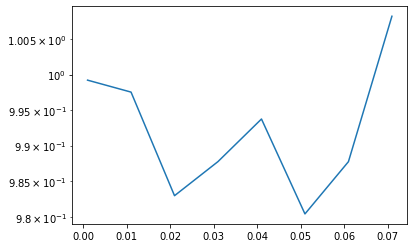

In [215]:
plt.plot(result_mix[:,0]/N, result_mix[:,1]/result_mix[:,2])
plt.yscale("log")

In [183]:
all_data[-1]

array([[2.00000000e+00, 2.00000244e+03, 2.00489613e+03],
       [4.20000000e+01, 2.03045038e+03, 2.22198781e+03],
       [8.20000000e+01, 2.22685685e+03, 2.48791809e+03],
       [1.22000000e+02, 2.74097531e+03, 2.81643749e+03],
       [1.62000000e+02, 3.70634629e+03, 3.22625172e+03],
       [2.02000000e+02, 5.23002806e+03, 3.74318016e+03],
       [2.42000000e+02, 7.39011420e+03, 4.40342662e+03],
       [2.82000000e+02, 1.02392281e+04, 5.25863033e+03],
       [3.22000000e+02, 1.38132580e+04, 6.38382652e+03],
       [3.62000000e+02, 1.81440368e+04, 7.89027158e+03],
       [4.02000000e+02, 2.32751542e+04, 9.94660289e+03],
       [4.42000000e+02, 2.92809712e+04, 1.28146629e+04],
       [4.82000000e+02, 3.62906773e+04, 1.69118761e+04],
       [5.22000000e+02, 4.45227383e+04, 2.29232365e+04],
       [5.62000000e+02, 5.43390733e+04, 3.20091964e+04],
       [6.02000000e+02, 6.63402596e+04, 4.62059886e+04],
       [6.42000000e+02, 8.15452576e+04, 6.92281739e+04],
       [6.82000000e+02, 1.01754

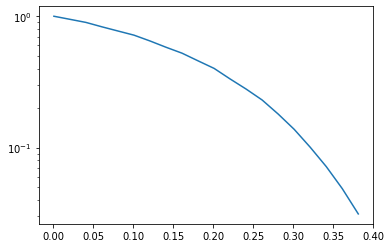

In [187]:
plt.plot(all_data[-1][:,0]/N, result_mix/all_data[-1][:,2])
plt.yscale("log")

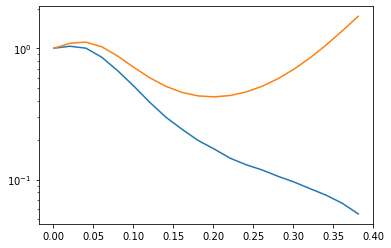

In [186]:
plt.plot(all_data[-1][:,0]/N, result_mix/all_data[-1][:,1])
plt.plot(all_data[-1][:,0]/N, all_data[-1][:,2]/all_data[-1][:,1])
plt.yscale("log")

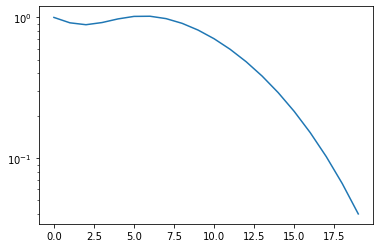

In [63]:
plt.plot(all_data[-1][:,1]/all_data[-1][:,2])
plt.yscale("log")

## Analytics in the true case

In [188]:
Nvalues = np.array([100, 500, 1000, 2000, 5000, 10000])
beta = "1"

W = []

for N in [100,500]:
    W.append(np.concatenate([np.array([0]),np.loadtxt(f"couplings_N{N}_beta{beta}.txt")])) #Need to add the starting 0

for N in Nvalues[2:]:
    W.append(np.concatenate([np.array([0]),np.loadtxt(f"couplings_N{N}_beta{beta}.txt")[:,1]])) #Need to add the starting 0

In [189]:
Pms = [compute_Pm(w) for w in W]

100%|██████████| 10000/10000 [02:31<00:00, 66.14it/s]
